In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.shape

(41188, 21)

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Age: Основная масса клиентов — люди среднего возраста (от 30 до 50 лет). Наличие клиентов старше 80 лет (max=98) является статистическим выбросом и требует проверки на предмет ошибки в данных. Маркетинговые кампании банка ориентированы на экономически активное население.
Duration: Распределение сильно скошено вправо. 75% звонков длятся менее 5.5 минут (319 сек). Наличие звонков длительностью более часа (максимальное значение) — аномалия. Главный инсайт: этот признак — мощный предиктор успеха (чем дольше разговор, тем вероятнее успех), но его нельзя использовать для прогноза будущих кампаний, так как длительность звонка неизвестна до его совершения. Это "data leakage" признак.
Campaign: В рамках одной кампании большинству клиентов звонили 1-3 раза. Однако наличие значений в 10, 20 и даже 50 разов контактов (max=56) указывает на крайне агрессивную и навязчивую тактику по отношению к некоторым клиентам, которая, скорее всего, даёт обратный эффект.
pdays: Это не числовой признак, а категориальный флаг. Значение 999 повсеместно используется для кодировки клиентов, с которыми не контактировали в предыдущих кампаниях. Тот факт, что у 75% и более клиентов стоит это значение, говорит о том, что это в основном "холодная" база, а не база постоянных клиентов. Это меняет подход к обработке признака: его нужно преобразовать в бинарный признак.
previous:  У 75% клиентов не было контактов в предыдущих кампаниях (previous=0). Это подтверждает вывод по pdays о "холодной" базе. У небольшой доли клиентов было много контактов, что может быть связано либо с их лояльностью, либо с настойчивостью менеджеров.
Макроэкономические показатели: 
emp.var.rate (Изменение уровня занятости): 
Отрицательное значение (например, -3.0): Значит, безработица растёт. Людей увольняют, новые рабочие места не создаются. Люди боятся тратить деньги, экономят и не думают о вкладах.
Положительное значение (например, 1.5): Экономика на подъёме! Безработица падает, у людей есть стабильная работа и деньги. Они больше доверяют банкам и готовы инвестировать.
euribor3m (Процентная ставка Euribor на 3 месяца): Это цена денег для банков.
Низкое значение (например, 0.5%): Банкам очень дёшево брать деньги в долг друг у друга. Значит, они могут предлагать вам высокие проценты по вкладам, чтобы привлечь ваши деньги. Вклады становятся выгодными.
Высокое значение (например, 5%): Кредиты для самих банков становятся дорогими. Им нет смысла предлагать вам высокие проценты, так как это нерентабельно. Вклады становятся неинтересными
cons.conf.idx (Индекс потребительской уверенности): Это настроение людей.
Низкое значение (например, -50): Люди пессимистичны. Боятся кризиса, безработицы. 
Высокое значение: Люди оптимистичны, верят в завтрашний день, готовы тратить и инвестировать.

Поведение человека сильно зависит от общей экономической ситуации. Когда в стране кризис (emp.var.rate отрицательный, cons.conf.idx низкий), почти все перестают доверять банкам и откладывают крупные финансовые решения. Когда всё хорошо — наоборот. Эти признаки не говорят о конкретном человеке (его работе, возрасте, семье). Они говорят о дне, в который ему позвонили. Если в этот день была плохая экономическая обстановка, вероятность успеха звонка всем клиентам падала. И наоборот. Все эти признаки сильно связаны между собой. Когда растёт безработица (emp.var.rate падает) -> настроение людей ухудшается (cons.conf.idx падает) -> центробанк снижает ставки (euribor3m падает), чтобы поддержать экономику. Из-за того что признаки повторяют друг друга, нет смысла тащить их все в модель. Нужно: Либо выбрать один самый показательный. Либо создать из них один новый обобщённый признак (с помощью специальных алгоритмов), который будет называться, условно, "Сила экономики".

In [6]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"\n {column} ({data[column].nunique()} уникальных значений):")
    print(data[column].value_counts().head(10)) 


 job (12 уникальных значений):
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
Name: count, dtype: int64

 marital (4 уникальных значений):
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

 education (8 уникальных значений):
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

 default (3 уникальных значений):
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

 housing (3 уникальных значений):
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

 loan (3 уникальных з

In [24]:
data_analysis = data.copy()

In [25]:
data_analysis['y'] = data_analysis['y'].map({'yes': 1, 'no': 0})

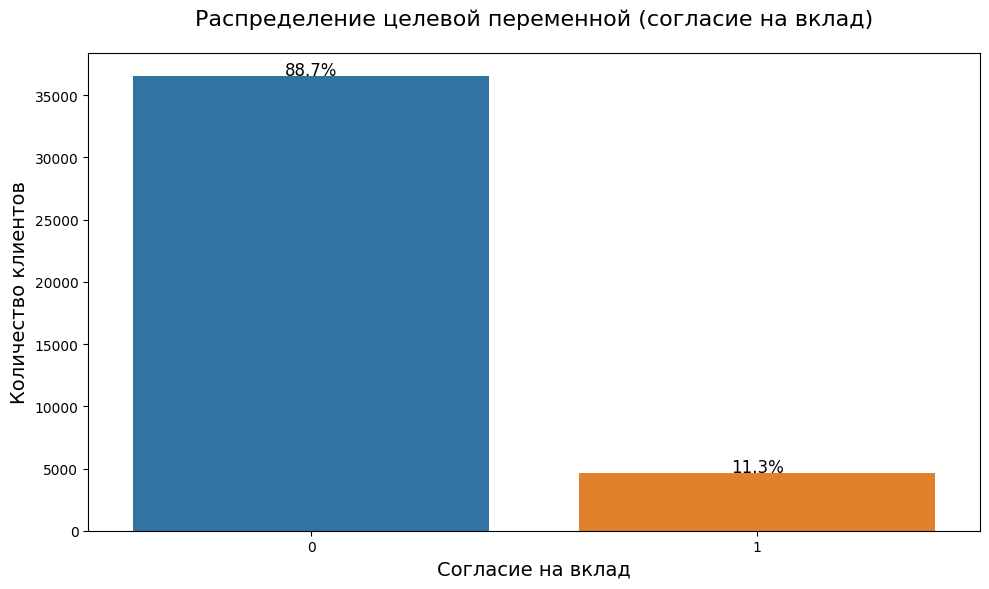

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='y', data=data_analysis, hue='y', legend=False)
plt.title('Распределение целевой переменной (согласие на вклад)', fontsize=16, pad=20)
plt.xlabel('Согласие на вклад', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)

total = len(data_analysis)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 100
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Заметен сильный дисбаланс классов

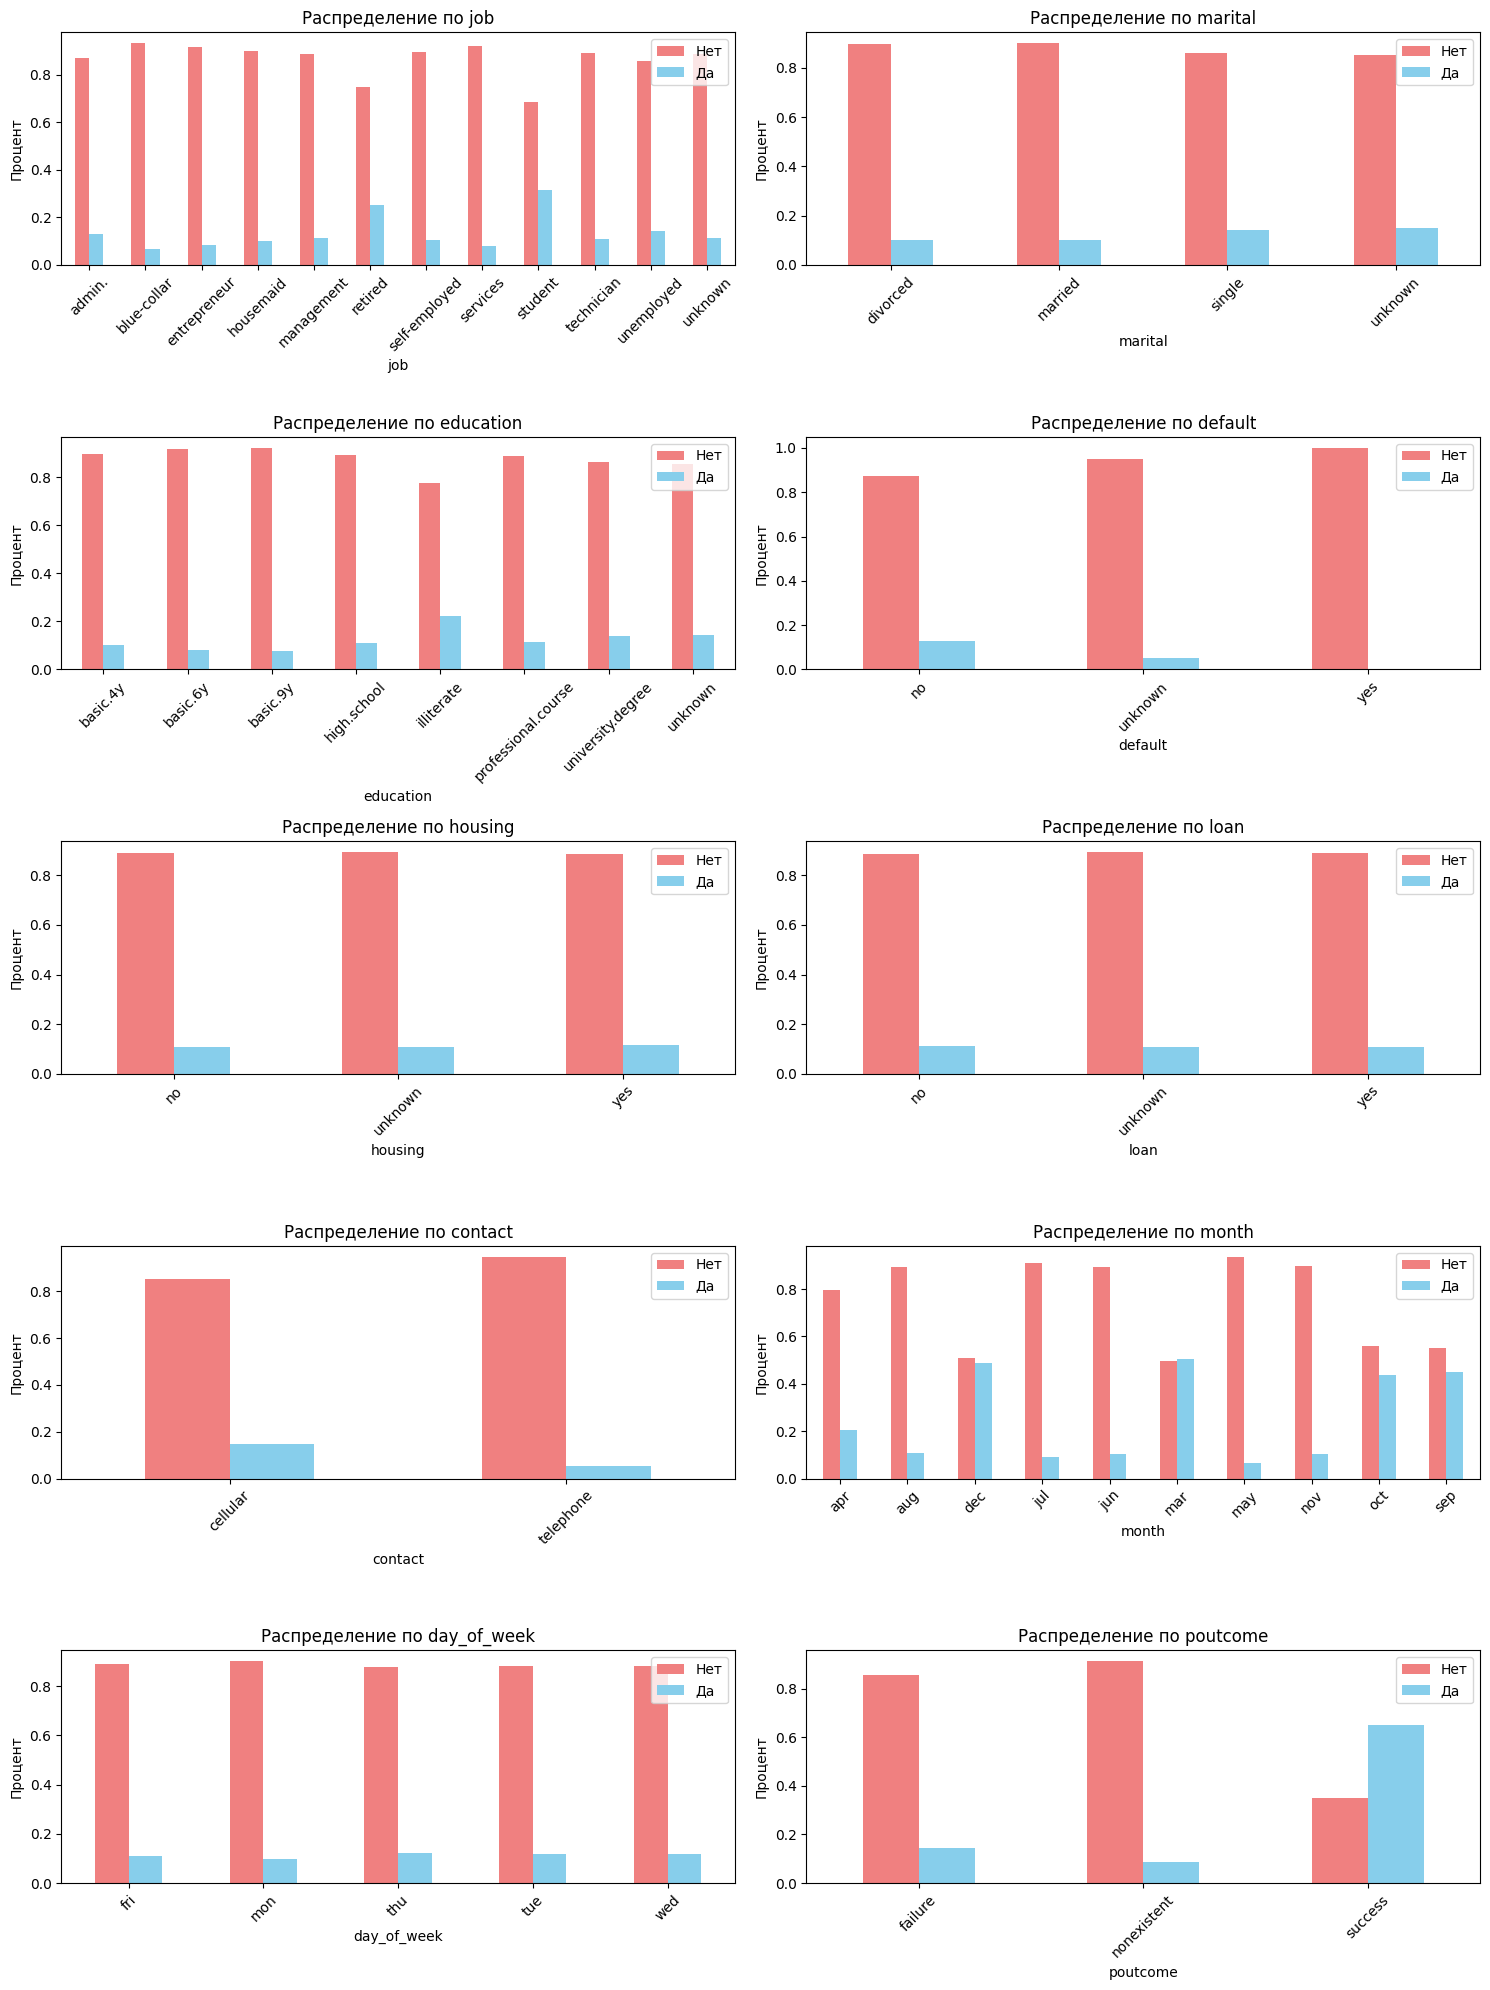

In [32]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                   'contact', 'month', 'day_of_week', 'poutcome']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        temp_df = data.groupby(col)['y'].value_counts(normalize=True).unstack()
        temp_df.plot(kind='bar', ax=axes[i], color=['lightcoral', 'skyblue'])
        axes[i].set_title(f'Распределение по {col}')
        axes[i].set_ylabel('Процент')
        axes[i].legend(['Нет', 'Да'])
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

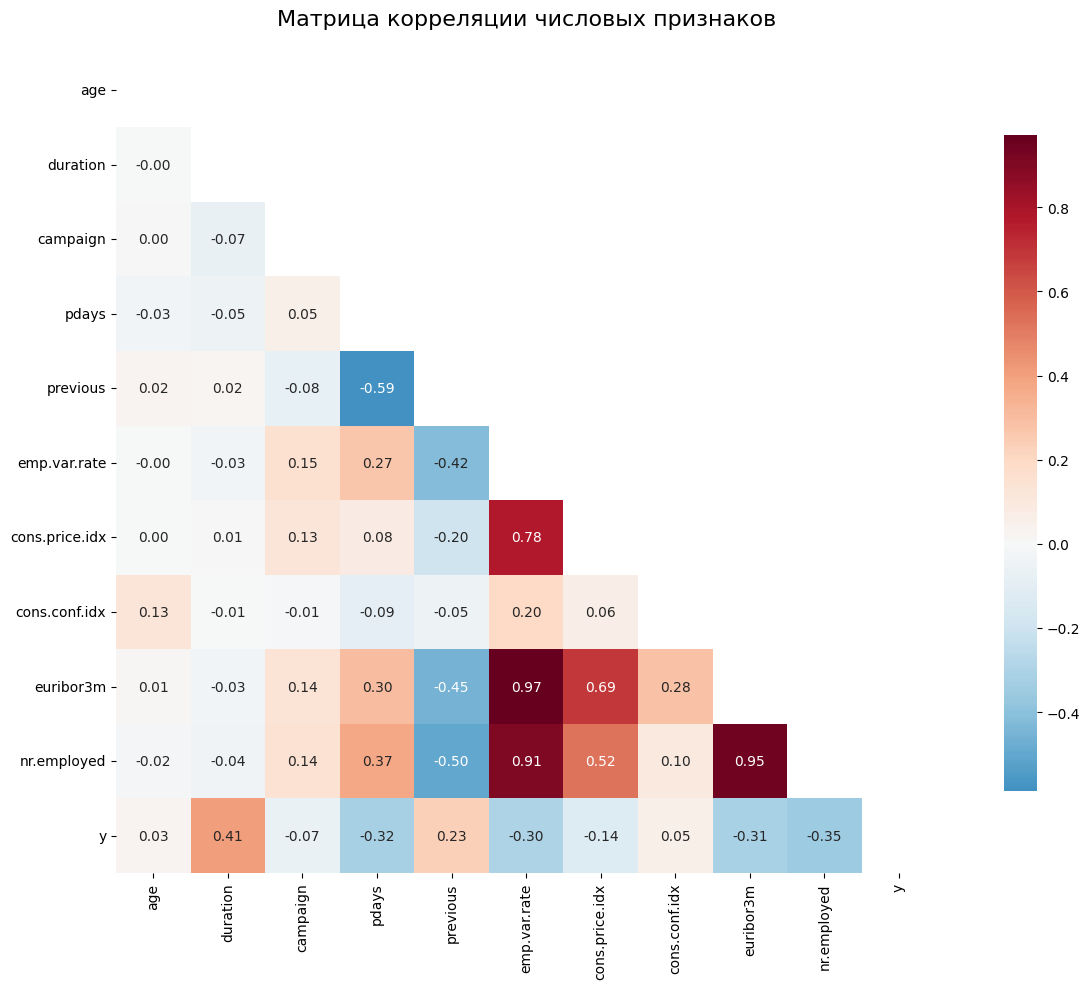

In [ ]:
numeric_data = data_analysis.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
corr_matrix = numeric_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляции числовых признаков', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Сильные корреляции между макроэкономическими показателями (euribor3m, emp.var.rate, nr.employed)

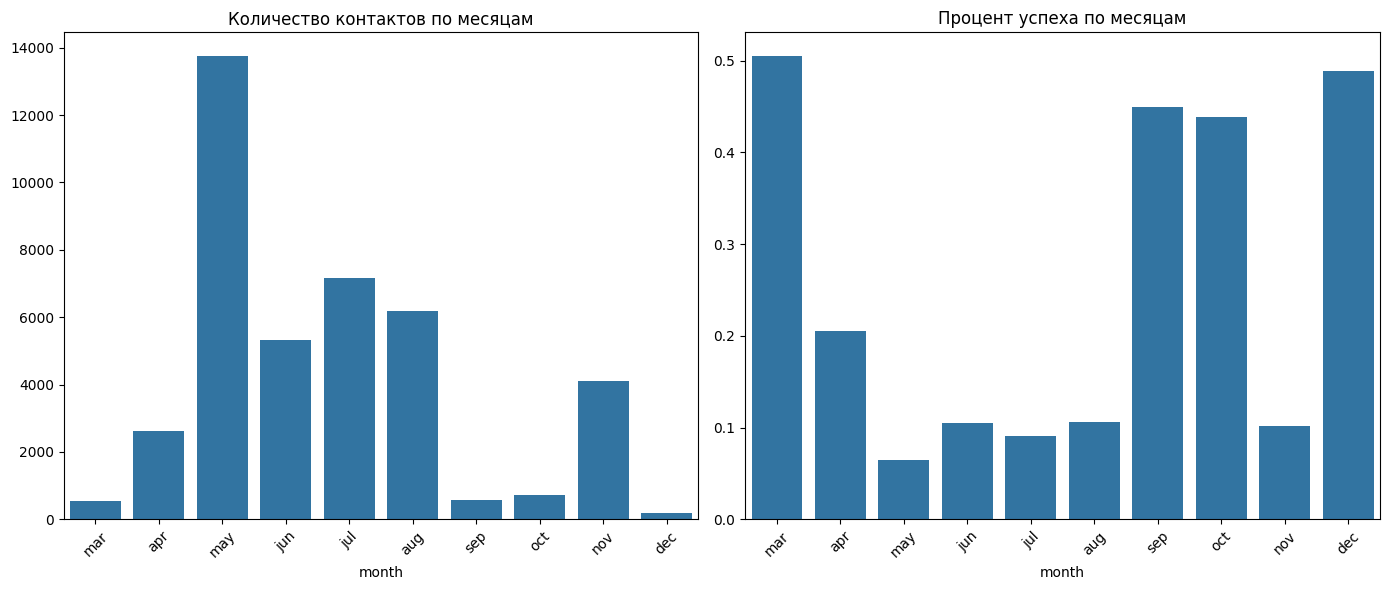

In [37]:
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
month_counts = data_analysis['month'].value_counts().reindex(month_order)
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Количество контактов по месяцам')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
month_success = data_analysis.groupby('month')['y'].mean().reindex(month_order)
sns.barplot(x=month_success.index, y=month_success.values)
plt.title('Процент успеха по месяцам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

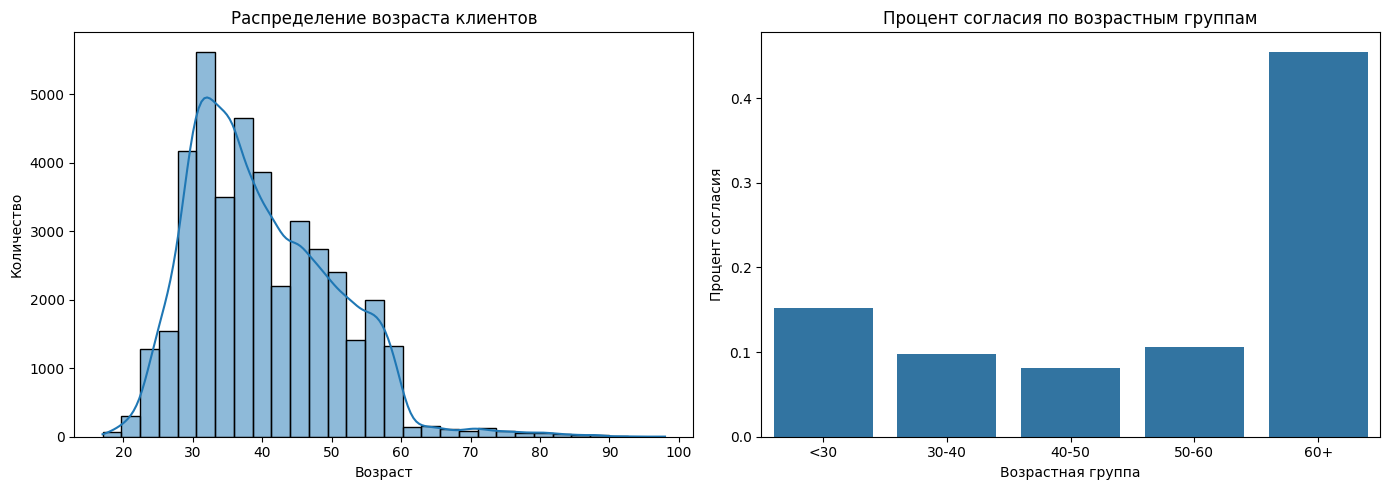

In [39]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_analysis['age'], bins=30, kde=True)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
data_analysis['age_group'] = pd.cut(data_analysis['age'], 
                                 bins=[0, 30, 40, 50, 60, 100],
                                 labels=['<30', '30-40', '40-50', '50-60', '60+'])
age_success = data_analysis.groupby('age_group', observed=False)['y'].mean()
sns.barplot(x=age_success.index, y=age_success.values)
plt.title('Процент согласия по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент согласия')

plt.tight_layout()
plt.show()